In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor


**Custom function made for any time series regression tasks using scikit learn**

In [28]:
def ShapTs_Scikit(datapath, target_col,drop_cols ,encode_cols , index_col ,models=None, split_ratio=0.2, scaling=None):
    df=pd.read_excel(datapath)
    df.drop(drop_cols, axis=1, inplace=True)
    df.set_index(index_col, inplace=True)
    for col in encode_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    
    if scaling:
        if scaling == 'minmax':
            scaler = MinMaxScaler()
        elif scaling == 'standard':
            scaler = StandardScaler()
        else:
            raise ValueError("Invalid value for scaling, expected either 'minmax' or 'standard'.")
        X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, shuffle=False)
    
    if models:
        all_models = {model_name: model for model_name, model in models.items()}
    else:
        all_models = {
            "Linear Regression": LinearRegression(),
            "Ridge": Ridge(),
            "Lasso": Lasso(),
            "Elastic Net": ElasticNet(),
            "Decision Tree": DecisionTreeRegressor(),
            "Random Forest": RandomForestRegressor(),
            "XG Boost": XGBRegressor(),
        }
    
    results = {}
    best_r2 = -np.inf
    best_model_name = None
    for name, model in all_models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        results[name] = {"r2_score": r2, "mae": mae}
        
        if r2 > best_r2:
            best_r2 = r2
            best_model_name = name
    
    best_model = all_models[best_model_name]
    print(f"The best model is: {best_model_name}")
    
    # Generate Shap plots
    explainer = shap.Explainer(best_model, masker=X_train)
    shap_values = explainer(X_test)
    explainer = shap.Explainer(best_model, masker=X_train)
    shap_values = explainer(X_test)

    interpretation_type = input("Enter 'local' for local interpretation, or 'global' for global interpretation: ")
    if interpretation_type == 'local':
        feature_index = int(input("Enter the index of the observation to interpret: "))
        shap.plots.waterfall(shap_values[feature_index], max_display=50)
    elif interpretation_type == 'global':
        plot_type = input("Enter 'summary' for summary plot, or 'bar' for bar plot: ")
        if plot_type == 'summary':
            shap.summary_plot(shap_values,feature_names=X_test.columns, plot_type='violin', layered_violin_max_num_bins=12, class_inds=range(7),use_log_scale=False,color='green',max_display=50)
        elif plot_type == 'bar':
            shap.plots.bar(shap_values,max_display=50)
        else:
            raise ValueError("Invalid value for plot_type, expected either 'summary' or 'bar'.")
    else:
        raise ValueError("Invalid value for interpretation_type, expected either 'local' or 'global'.")    
        

    plt.show()

**Testing Waterfall Chart for Local Interpretation**


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.319e+13, tolerance: 4.927e+10
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.103e+14, tolerance: 4.927e+10


The best model is: Elastic Net


Enter 'local' for local interpretation, or 'global' for global interpretation:  local
Enter the index of the observation to interpret:  0


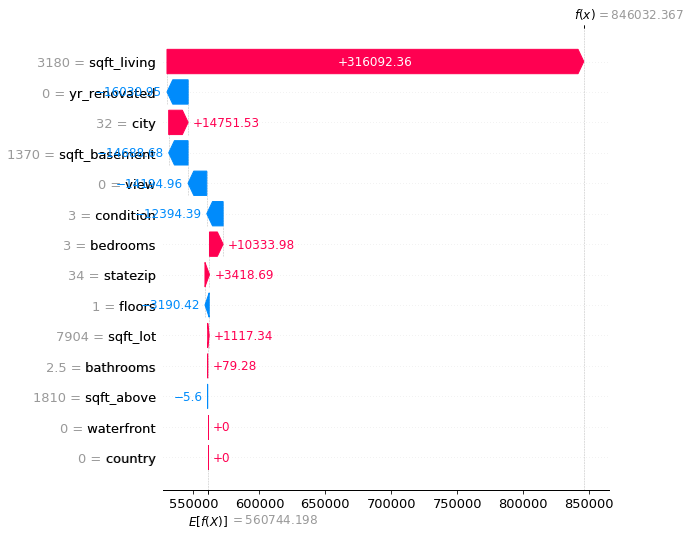

In [25]:
data_path = '/kaggle/input/yr-built-ron-koro/Duplicate_regression_data.xlsx'
target_col = 'price'
drop_cols = ['date','street']
encode_cols = [ 'city','statezip', 'country']
index_col = 'yr_built'
ShapTs_Scikit(data_path, target_col,drop_cols ,encode_cols , index_col ,models=None, split_ratio=0.2, scaling=None)

**Testing Bar Plot for Global interpretation**

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.319e+13, tolerance: 4.927e+10
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.103e+14, tolerance: 4.927e+10


The best model is: Elastic Net


Enter 'local' for local interpretation, or 'global' for global interpretation:  global
Enter 'summary' for summary plot, or 'bar' for bar plot:  bar


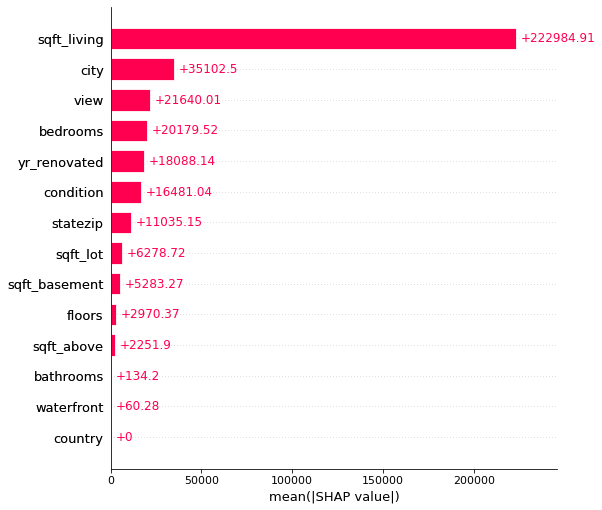

In [26]:
data_path = '/kaggle/input/yr-built-ron-koro/Duplicate_regression_data.xlsx'
target_col = 'price'
drop_cols = ['date','street']
encode_cols = [ 'city','statezip', 'country']
index_col = 'yr_built'
ShapTs_Scikit(data_path, target_col,drop_cols ,encode_cols , index_col ,models=None, split_ratio=0.2, scaling=None)

**Testing Summary Plots for Global Interpretation**

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.319e+13, tolerance: 4.927e+10
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.103e+14, tolerance: 4.927e+10


The best model is: Random Forest


100%|===================| 921/922 [00:54<00:00]        

Enter 'local' for local interpretation, or 'global' for global interpretation:  global
Enter 'summary' for summary plot, or 'bar' for bar plot:  summary


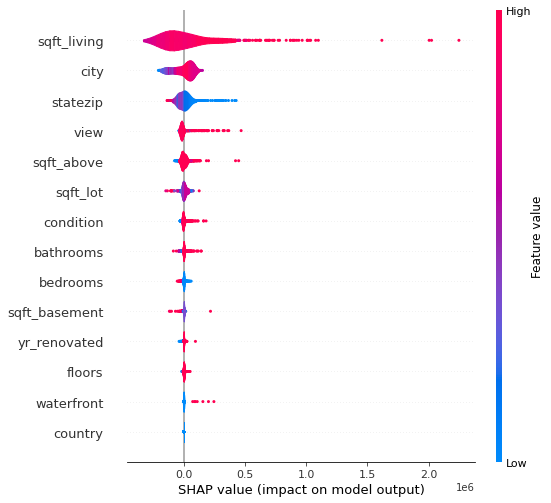

In [29]:
data_path = '/kaggle/input/yr-built-ron-koro/Duplicate_regression_data.xlsx'
target_col = 'price'
drop_cols = ['date','street']
encode_cols = [ 'city','statezip', 'country']
index_col = 'yr_built'
ShapTs_Scikit(data_path, target_col,drop_cols ,encode_cols , index_col ,models=None, split_ratio=0.2, scaling=None)